In [1]:
import pandas as pd
import sys
import pandas as pd
import matplotlib.pyplot as plt
import os
sys.path.append("../scripts")
import stock_eda
import news_eda
import technical_indicators as ti
import sentiment_analyzer as san

In [2]:
# Load news and stock data
news_data = news_eda.load_data("../data/raw_analyst_ratings.csv")
stock_data = stock_eda.load_data("../data/TSLA_historical_data.csv")

In [3]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [5]:
# Convert 'date' column in news data and 'Date' column in stock data to datetime
news_data = news_eda.convert_date(news_data)
stock_data = stock_eda.convert_date(stock_data)

In [6]:
news_data = news_data[news_data['stock'] == 'TSLA']
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
1255221,1261140,Tesla's Stock Closes At All-Time High As Musk ...,https://www.benzinga.com/news/20/06/16225150/t...,Drew Levine,2020-06-10 17:02:47,TSLA
1255222,1261141,'Tesla factory workplace safety is 5% better t...,https://www.benzinga.com/news/20/06/16225621/t...,Benzinga Newsdesk,2020-06-10 15:08:09,TSLA
1255223,1261142,'Tesla hacker unlocks Performance upgrade and ...,https://www.benzinga.com/news/20/06/16224205/t...,Benzinga Newsdesk,2020-06-10 12:41:58,TSLA
1255224,1261143,GM On Track To Spend $20B On EV And AV Develop...,https://www.benzinga.com/news/20/06/16223414/g...,Benzinga Newsdesk,2020-06-10 11:33:18,TSLA
1255225,1261144,"Tesla's Journey To $1,000 In 2020",https://www.benzinga.com/news/20/06/16222035/t...,Wayne Duggan,2020-06-10 10:15:07,TSLA


In [7]:
# Filter stock data to match the date range of news data
start_date = news_data['date'].min()
end_date = news_data['date'].max()
stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)]

In [8]:
# Sentiment analysis
san.sentiment_category(news_data)

,Unnamed: 0,headline,url,publisher,date,stock,sentiment_class,sentiment_score
1255221,1261140,Tesla's Stock Closes At All-Time High As Musk ...,https://www.benzinga.com/news/20/06/16225150/t...,Drew Levine,2020-06-10 17:02:47,TSLA,Positive,0.5574
1255222,1261141,'Tesla factory workplace safety is 5% better t...,https://www.benzinga.com/news/20/06/16225621/t...,Benzinga Newsdesk,2020-06-10 15:08:09,TSLA,Positive,0.8176
1255223,1261142,'Tesla hacker unlocks Performance upgrade and ...,https://www.benzinga.com/news/20/06/16224205/t...,Benzinga Newsdesk,2020-06-10 12:41:58,TSLA,Positive,0.4019
1255224,1261143,GM On Track To Spend $20B On EV And AV Develop...,https://www.benzinga.com/news/20/06/16223414/g...,Benzinga Newsdesk,2020-06-10 11:33:18,TSLA,Neutral,0.0000
1255225,1261144,"Tesla's Journey To $1,000 In 2020",https://www.benzinga.com/news/20/06/16222035/t...,Wayne Duggan,2020-06-10 10:15:07,TSLA,Neutral,0.0000
...,...,...,...,...,...,...,...,...
1257091,1263065,Electrek.Co Tweet: Tesla's head of Europe is out,https://www.benzinga.com/news/19/07/14015998/e...,Charles Gross,2019-07-02 00:00:00,TSLA,Neutral,0.0000
1257092,1263066,Tesla's Q2 Delivery Number Could Cause A Big Move,https://www.benzinga.com/analyst-ratings/analy...,Wayne Duggan,2019-07-01 00:00:00,TSLA,Positive,0.0772
1257093,1263067,'Tesla Electric Airplane? Elon Musk sees elect...,https://www.benzinga.com/news/19/07/14011389/t...,Benzinga Newsdesk,2019-07-01 00:00:00,TSLA,Neutral,0.0000
1257094,1263068,"UPDATE: JMP Reiterates Outperform, $347 Target...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga_Newsdesk,2019-07-01 00:00:00,TSLA,Negative,-0.1280


In [9]:
# Calculate daily returns for stock
stock_data['daily_return'] = stock_data['Close'].pct_change()

# Rename columns to avoid conflicts
news_data.rename(columns={'date': 'Date'}, inplace=True)

In [10]:
# Merge news data with stock data on Date
combined_data = pd.merge(stock_data, news_data, on='Date', how='left')


In [11]:
# Aggregate sentiment scores by date
daily_sentiment = combined_data.groupby('Date')['sentiment_score'].mean().reset_index()
daily_sentiment.rename(columns={'sentiment_score': 'average_sentiment_score'}, inplace=True)

In [12]:
# Merge aggregated sentiment with combined data
final_data = pd.merge(combined_data, daily_sentiment, on='Date', how='left')
final_data = final_data[['Date', 'average_sentiment_score', 'Close', 'daily_return']]
final_data.head()

,Date,average_sentiment_score,Close,daily_return
0,2019-07-01,0.118975,15.144667,NaN
1,2019-07-01,0.118975,15.144667,NaN
2,2019-07-01,0.118975,15.144667,NaN
3,2019-07-01,0.118975,15.144667,NaN
4,2019-07-02,0.026700,14.970000,-0.011533


In [13]:
# Calculate correlation between sentiment and daily return
correlation_return = final_data[['average_sentiment_score', 'daily_return']].corr().iloc[0, 1]
print(f"Correlation between sentiment and daily return: {correlation_return}")

Correlation between sentiment and daily return: 0.18349474149321074


In [14]:
# Calculate correlation between sentiment and closing price
correlation_close = final_data[['average_sentiment_score', 'Close']].corr().iloc[0, 1]
print(f"Correlation between sentiment and closing price: {correlation_close}")

Correlation between sentiment and closing price: -0.037032856075808834


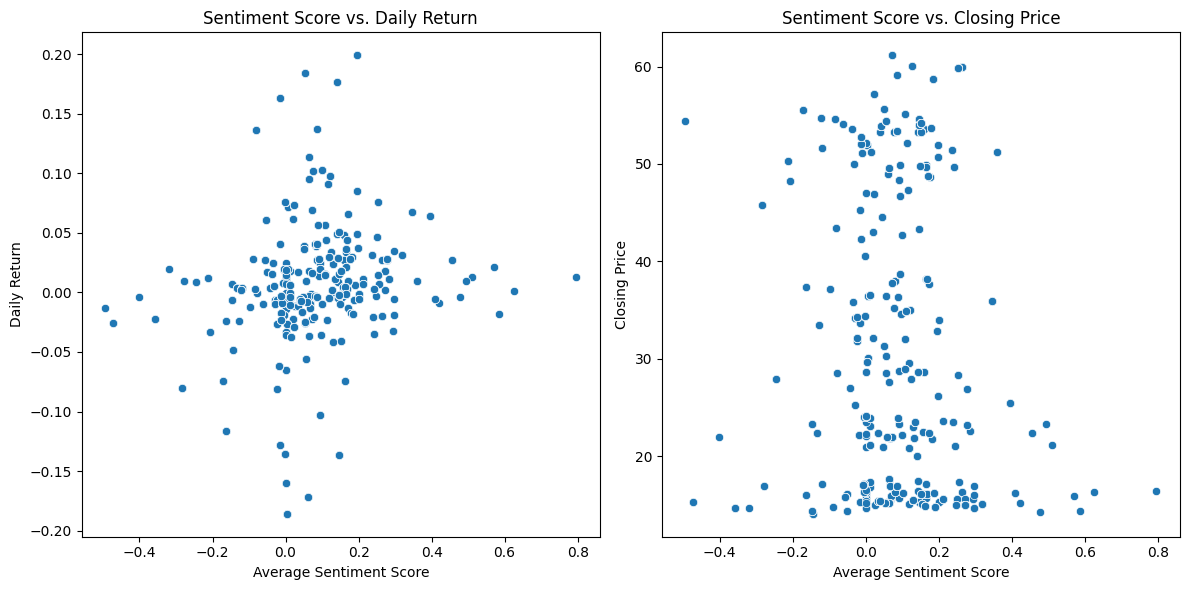

In [15]:
san.plot_scatter(final_data)

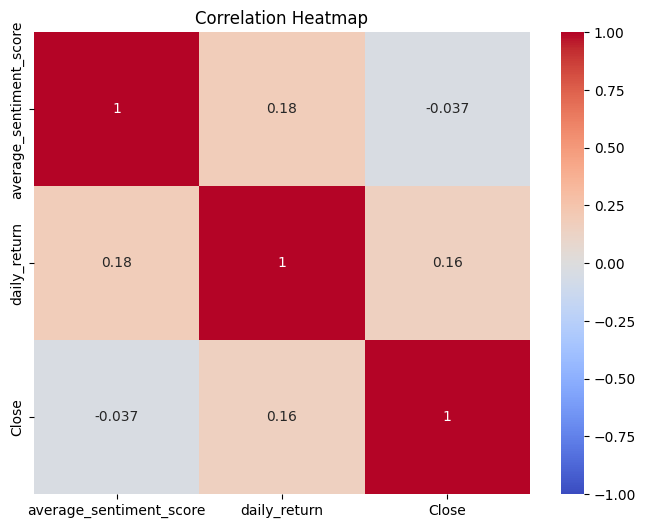

In [16]:
san.plot_heatmap(final_data)